In [1]:
# Import necessary packages
import pandas as pd
import os
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn import tree
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import scipy as sp
import scipy.stats as sciStats

dir_path = os.path.abspath('')
os.chdir(os.path.dirname(dir_path))

# database = 'GSE122649_RAW' # Specifies the local directory with the sample data from the GSE122649 database
# starterFile = 'GSM3477217_ALS-21_counts' # Specifies an arbitrarily chosen file from the GSE122649 database to add the genes DataFrame column
database = 'GSE124439_RAW' # Specifies the local directory with the sample data from the GSE124439 database
starterFile = 'GSM3533230_CGND-HRA-00013_counts' # Specifies an arbitrarily chosen file from the GSE124439 database to add the genes DF column

path = ('data' + '/' + database + '/' + starterFile + '.txt') # Specifies the local path to the starterFile
data = pd.read_csv(path, sep = "\s+", header = 0, names = ['genes','counts']) # Reads in the starterFile
df = pd.DataFrame(data['genes']) # Adds the genes column to start a Pandas DataFrame (same for all files)
dfLog = pd.DataFrame(data['genes']) # For creating a log10-scaled version of the above (more easily visualized)

for filename in os.listdir('data' + '/' + database): # Iterates through each file in the database
    path = ('data' + '/' + database + '/' + filename)
    data = pd.read_csv(path, sep = "\s+", header = 0, names = ['genes','counts'])

    regData = []
    logData = []
    for i in data['counts']:
        regData.append(i)
        if(i == 0):
            logData.append(0)
        else:
            logData.append(math.log10(i))

    truncName = filename[:-4]
    df[truncName] = pd.DataFrame(regData) # Adds the read counts for the given sample to the DataFrame
    dfLog[truncName] = pd.DataFrame(logData)

geneIndexedDF = df.set_index('genes') # Makes the genes column the index for the DataFrame
geneIndexedLogDF = dfLog.set_index('genes')

sortedDF = geneIndexedDF.sort_values(by=[starterFile],ascending=False) # Sorts reads descending for the starterFile
sortedLogDF = geneIndexedLogDF.sort_values(by=[starterFile],ascending=False)

print(sortedDF)

# Plots a heatmap of the data
plt.subplots(figsize=(20,20))
ax = sns.heatmap(sortedLogDF,cmap="YlGnBu")
plt.tight_layout()
plt.savefig("figures/heatmap_db39_log.png")
plt.show()

                       GSM3533230_CGND-HRA-00013_counts  \
genes                                                     
MALAT1                                           515451   
MIRb:MIR:SINE                                    458415   
L2a:L2:LINE                                      354241   
MIR:MIR:SINE                                     347395   
L2c:L2:LINE                                      297163   
AluJb:Alu:SINE                                   236469   
7SK:RNA:RNA                                      227589   
MIRc:MIR:SINE                                    203821   
AluSx:Alu:SINE                                   179765   
L2b:L2:LINE                                      177960   
MIR3:MIR:SINE                                    169290   
AluSx1:Alu:SINE                                  157627   
AluSz:Alu:SINE                                   155138   
AluJr:Alu:SINE                                   145884   
AluJo:Alu:SINE                                   127230 

<Figure size 2000x2000 with 2 Axes>

In [2]:
df_T = df.T
df_T.columns = df_T.iloc[0]
df_T = df_T.drop('genes')

sc = StandardScaler()
temp = sc.fit_transform(df_T)
df_T = pd.DataFrame.from_records(temp, index = df_T.index, columns = df_T.columns)

print(df_T)

genes                                   A1BG  A1BG-AS1      A1CF       A2M  \
GSM3533230_CGND-HRA-00013_counts    0.192516  0.633984 -0.257893  0.683758   
GSM3533231_CGND-HRA-00014-2_counts -0.638663 -0.240999  2.768056 -0.524355   
GSM3533232_CGND-HRA-00015_counts   -0.883128 -0.490995 -0.257893 -0.490622   
GSM3533233_CGND-HRA-00016_counts   -0.785342 -0.365997 -0.257893 -0.254491   
GSM3533234_CGND-HRA-00017_counts   -0.785342 -0.345164 -0.257893 -0.587899   
GSM3533235_CGND-HRA-00018_counts   -1.127592 -1.657639 -0.257893 -1.175481   
GSM3533236_CGND-HRA-00019_counts   -0.540878 -0.428496 -0.257893 -0.186240   
GSM3533237_CGND-HRA-00020-2_counts -0.491985 -0.720157 -0.257893 -0.091317   
GSM3533238_CGND-HRA-00021_counts   -0.198627 -0.720157 -0.257893 -1.395138   
GSM3533239_CGND-HRA-00022_counts   -0.443092 -0.657658  1.255081  1.476092   
GSM3533240_CGND-HRA-00023_counts    0.290302  1.238140  1.255081 -0.689098   
GSM3533241_CGND-HRA-00025_counts   -0.491985  0.508987 -0.257893

In [3]:
# Load the data matrix describing what each sample is
matrixPath = ('data/patient_info_matrix.xlsx') # Specifies the local path to the matrix of information
matrixData = pd.read_excel(matrixPath, header=0) # Reads in the starterFile
print(matrixData.head())

# print(list(dict.fromkeys(matrixData['Sex'])))
sexInfo = list(matrixData['Gender'])
# print(sexInfo)

# print(list(dict.fromkeys(matrixData['Subject Group'])))
subjectGroup = list(matrixData['Subject Group'])

# print(list(dict.fromkeys(matrixData['ALS NMF subtype**'])))
molSubtype = list(matrixData['ALS NMF subtype**'])

         RNA-seq ID          Tissue  Gender     Subject Group  \
0    CGND-HRA-00013  Frontal Cortex  Female  ALS Spectrum MND   
1  CGND-HRA-00014-2  Frontal Cortex    Male  ALS Spectrum MND   
2    CGND-HRA-00015  Frontal Cortex    Male  ALS Spectrum MND   
3    CGND-HRA-00016  Frontal Cortex  Female  ALS Spectrum MND   
4    CGND-HRA-00017  Frontal Cortex  Female  ALS Spectrum MND   

  C9orf72 repeat expansion* ALS NMF subtype**  
0                        No            ALS-Ox  
1                        No            ALS-Ox  
2                        No            ALS-Ox  
3                        No            ALS-TE  
4                        No            ALS-Ox  


In [4]:
sexINTfo = []
for i in sexInfo:
    if (i == 'Female'):
        sexINTfo.append(0)
    else:
        sexINTfo.append(1)
print(sexINTfo)

subGroupInt = []
for i in subjectGroup:
    if (i == 'Non-Neurological Control'):
        subGroupInt.append(0)
    elif (i == 'Other Neurological Disorders'):
        subGroupInt.append(1)
    else:
        subGroupInt.append(2)
print(subGroupInt)

molSubtypeInt = []
for i in molSubtype:
    if (i == 'ALS-Ox'):
        molSubtypeInt.append(0)
    elif (i == 'ALS-TE'):
        molSubtypeInt.append(1)
    elif (i == 'ALS-Glia'):
        molSubtypeInt.append(2)        
    else:
        molSubtypeInt.append(3)
print(molSubtypeInt)

[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2,

In [5]:
df_T_exp = df_T
df_T_exp['Sex'] = sexINTfo
df_T_exp['SubjectGroup'] = subGroupInt
df_T_exp['MolSubtype'] = molSubtypeInt

# Dividing the dataset by sex
femaleData = df_T_exp.loc[df_T_exp['Sex'] == 0]
femaleData_SG = list(femaleData['SubjectGroup'])
femaleData_MS = list(femaleData['MolSubtype'])
femaleData = femaleData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

maleData = df_T_exp.loc[df_T_exp['Sex'] == 1]
maleData_SG = list(maleData['SubjectGroup'])
maleData_MS = list(maleData['MolSubtype'])
maleData = maleData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

# Dividing the dataset by the subject group (control, ALS, other neurological disorder)
controlData = df_T_exp.loc[df_T_exp['SubjectGroup'] == 0]
controlData_MF = list(controlData['Sex'])
controlData_MS = list(controlData['MolSubtype'])
controlData = controlData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

otherNDData = df_T_exp.loc[df_T_exp['SubjectGroup'] == 1]
otherNDData_MF = list(otherNDData['Sex'])
otherNDData_MS = list(otherNDData['MolSubtype'])
otherNDData = otherNDData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

alsData = df_T_exp.loc[df_T_exp['SubjectGroup'] == 2]
alsData_MF = list(alsData['Sex'])
alsData_MS = list(alsData['MolSubtype'])
alsData = alsData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

# Dividing the dataset by the molecular ALS subtypes
alsOXData = df_T_exp.loc[df_T_exp['MolSubtype'] == 0]
alsOXData_MF = list(alsOXData['Sex'])
alsOXData_SG = list(alsOXData['SubjectGroup'])
alsOXData = alsOXData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

alsTEData = df_T_exp.loc[df_T_exp['MolSubtype'] == 1]
alsTEData_MF = list(alsTEData['Sex'])
alsTEData_SG = list(alsTEData['SubjectGroup'])
alsTEData = alsTEData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

alsGliaData = df_T_exp.loc[df_T_exp['MolSubtype'] == 2]
alsGliaData_MF = list(alsGliaData['Sex'])
alsGliaData_SG = list(alsGliaData['SubjectGroup'])
alsGliaData = alsGliaData.drop(['Sex','SubjectGroup','MolSubtype'], axis=1)

[0.3009386  0.08686946 0.07840555 0.048629   0.02981121 0.02513866
 0.0195248  0.01727549 0.01235366 0.00986511]


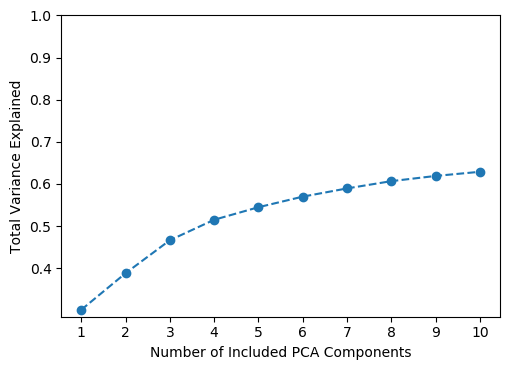

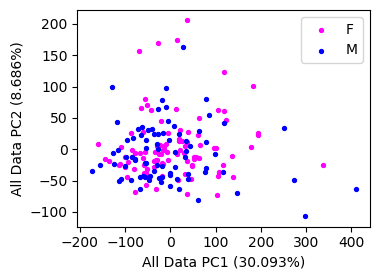

[0.34647058 0.14434598 0.09491163 0.07507713 0.05557294 0.0490818
 0.03415696 0.03080283 0.02755061 0.02651772]


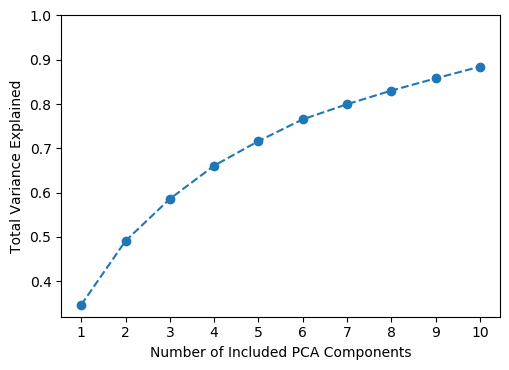

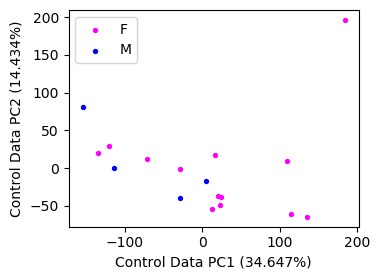

[0.32043189 0.09444919 0.07339303 0.04912162 0.02532369 0.02358956
 0.01839342 0.01285346 0.01027608 0.00982769]


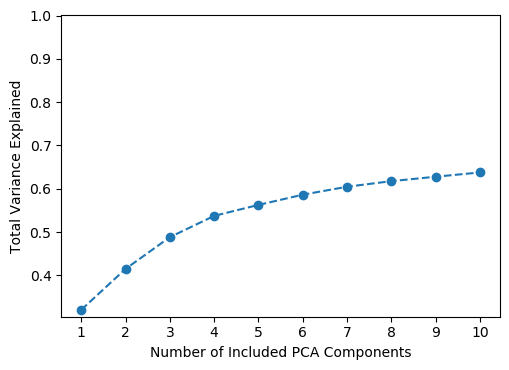

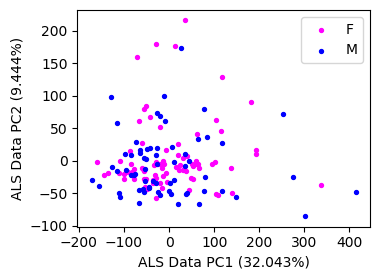

In [6]:
# Perform a PCA on the data
PCAs = [df_T, controlData, alsData]
labels = ['All','Control','ALS']
legends = [sexINTfo,controlData_MF,alsData_MF]

for i in range(len(PCAs)):
    X = PCAs[i]
    label = labels[i]
    legend = legends[i]

    sc = StandardScaler()
    X_scaled = sc.fit_transform(X)

    pca = PCA(n_components = 10)
    pcaScores = pca.fit_transform(X_scaled)

    # print('# of scores matrix rows = ' + str(len(pcaScores)))
    # print('# of scores matrix columns = ' + str(len(pcaScores[0])))

    pcaLoadings = pca.components_
    # print(pcaLoadings)
    # print('# of loadings matrix rows = ' + str(len(pcaLoadings)))
    # print('# of loadings matrix columns = ' + str(len(pcaLoadings[0])))

    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)

    # Calculate the cumulative explained variance as more components are included
    num_com = []
    com_counter = 0
    cum_exvar = []
    cum_counter = 0
    for i in explained_variance:
        com_counter = com_counter + 1
        num_com.append(com_counter)
        cum_counter = cum_counter + i
        cum_exvar.append(cum_counter)
    # print(cum_exvar)

    # Plot the cumulative explained variance vs. the # of included components
    plt.figure = figure(num=None, figsize=(5.2,3.8), dpi=100)
    plt.plot(num_com,cum_exvar,'--o')
    plt.xlabel('Number of Included PCA Components')
    plt.ylabel('Total Variance Explained')
    plt.xticks(num_com,num_com)
    plt.yticks(np.linspace(0.4,1.0,7))
    plt.tight_layout()
    plt.savefig('figures/pcaScree_' + label + '_varexplained.png', bbox='tight')

    # Plot the first two PCs
    fPC1 = []
    fPC2 = []
    mPC1 = []
    mPC2 = []
    i = 0
    while(i < len(legend)):
        if(legend[i] == 0):
            fPC1.append(pcaScores[i,0])
            fPC2.append(pcaScores[i,1])
        else:
            mPC1.append(pcaScores[i,0])
            mPC2.append(pcaScores[i,1])
        i = i + 1

    plt.figure = figure(num=None, figsize=(3.9,2.9), dpi=100)
    plt.scatter(fPC1, fPC2, c='magenta', s=8, label='F')
    plt.scatter(mPC1, mPC2, c='blue', s=8, label='M')
    plt.xlabel(label + ' Data PC1 (' + str(int(explained_variance[0]*100000)/1000) + '%)')
    plt.ylabel(label + ' Data PC2 (' + str(int(explained_variance[1]*100000)/1000) + '%)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('figures/pc1_pc2_' + label + '.png', bbox='tight')
    plt.show()

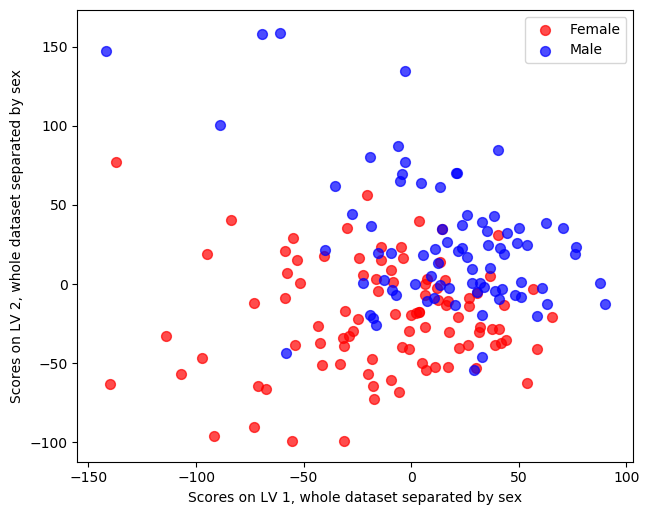

,LV 1,LV 2,LV 3,LV 4,LV 5,LV 6,LV 7,LV 8,LV 9
GSM3533230_CGND-HRA-00013_counts,-67.395140,-66.377140,-56.094087,67.022297,-29.282241,17.746878,3.040618,-11.239589,-13.396337
GSM3533231_CGND-HRA-00014-2_counts,13.285926,-0.706279,15.893188,24.070491,4.463914,15.332180,48.978728,6.192878,-8.437550
GSM3533232_CGND-HRA-00015_counts,20.528827,-13.030392,18.795389,14.565278,-0.610164,0.707358,46.955067,12.939140,-13.908702
GSM3533233_CGND-HRA-00016_counts,17.790159,-30.162099,-12.703700,5.906101,51.168346,-7.771162,-11.182622,-5.183197,-5.601776
GSM3533234_CGND-HRA-00017_counts,3.721381,-17.564256,-22.273667,21.053970,28.400178,-33.093077,15.424928,-20.251793,6.759530
GSM3533235_CGND-HRA-00018_counts,54.052002,-62.385796,-11.365309,-3.950838,-15.471434,-14.243909,-9.473343,-20.259785,3.739613
GSM3533236_CGND-HRA-00019_counts,12.472408,-9.918121,-16.126814,10.012936,11.923250,-48.199024,-32.339799,-13.497236,-6.969098
GSM3533237_CGND-HRA-00020-2_counts,32.948923,-19.190916,20.438492,10.700362,-12.635138,5.772979,34.462094,9.753101,-13.577427
GSM3533238_CGND-HRA-00021_counts,11.003705,-52.399362,-31.793825,7.607251,-24.095691,-3.140387,-18.152505,-6.090323,-4.072550
GSM3533239_CGND-HRA-00022_counts,-19.285054,-19.444648,26.104932,52.258287,-36.068729,-28.319375,8.662643,-0.434078,-10.753089


In [7]:
# Whole-data PLS-DA by sex
numComp = 9
plsr = PLSRegression(n_components=numComp, scale=False)
plsr.fit(df_T, sexINTfo)

# print(plsr.x_scores_) # scores
# print(plsr.x_scores_.shape) # scores shape
# print(plsr.x_weights_) # loadings
# print(plsr.x_weights_.shape) # loadings shape

scores = pd.DataFrame(plsr.x_scores_)
# print(scores)
scores.index = df_T.index

plsColumnNames = []
for i in range(numComp):
    plsColumnNames.append('LV ' + str(i + 1))
scores.columns = plsColumnNames

colormap = {
    0: '#ff0000',  # Red
    1: '#0000ff',  # Blue
}

gendLabels = ['Female', 'Male']
scores['Sex'] = sexINTfo
groups = scores.groupby('Sex')

figure(num=None, figsize=(6.6,5.25), dpi=100)
for name, group in groups:
    plt.scatter(group['LV 1'], group['LV 2'], s=50, alpha=0.7, c=colormap[name], label=gendLabels[name])
plt.xlabel('Scores on LV 1, whole dataset separated by sex')
plt.ylabel('Scores on LV 2, whole dataset separated by sex')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('figures/plsda_combined.png', bbox='tight')
plt.show()

#plt.clf()
scores.drop('Sex', axis=1)

In [8]:
# 10-fold Cross Validation Function, courtesy of Erin Tevonian

#Input:values of X and Y used during PLSDA
#Output: accuracy score array for each of the 10 validations (score = fraction of correctly classified samples)

def cross_val_plsda(X, y):
    kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

    accuracy = []

    for train_index, test_index in kf_10.split(X,y):
        X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

        plsr.fit(X_train, y_train)

        scores = pd.DataFrame(data = plsr.x_scores_)

        #Need to compare integers of Y pred and Y test to use accuracy score 
        y_pred = plsr.predict(X_test)
        y_pred = y_pred.round()
        y_pred = y_pred.astype(int)

        test_y = y_test.astype(int)

        accuracy.append(accuracy_score(test_y, y_pred)) 
        
        
    return accuracy

<Figure size 495x394 with 0 Axes>

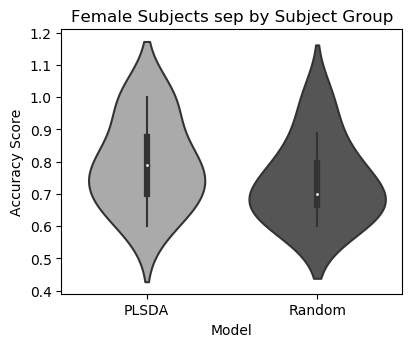

T-test for Female Subjects sep by Subject Group yields: Ttest_indResult(statistic=0.9189474513293687, pvalue=0.37032211949236116)


<Figure size 495x394 with 0 Axes>

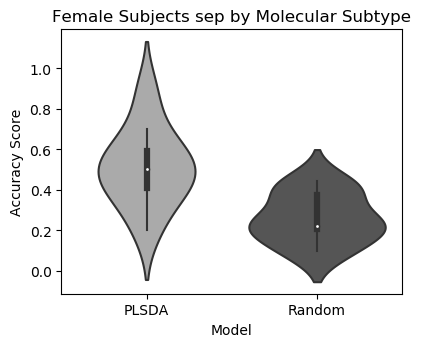

T-test for Female Subjects sep by Molecular Subtype yields: Ttest_indResult(statistic=3.483847261439006, pvalue=0.0032694245596250316)


<Figure size 495x394 with 0 Axes>

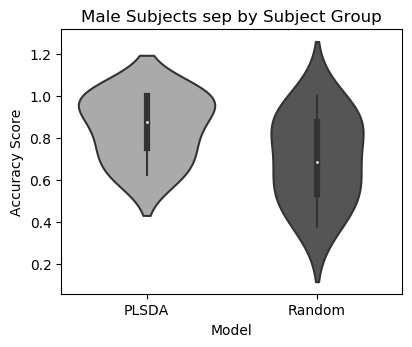

T-test for Male Subjects sep by Subject Group yields: Ttest_indResult(statistic=1.8467610337532776, pvalue=0.08262813115630643)


<Figure size 495x394 with 0 Axes>

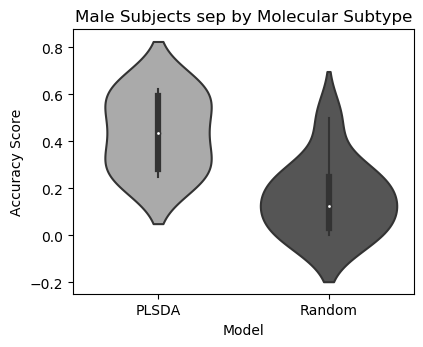

T-test for Male Subjects sep by Molecular Subtype yields: Ttest_indResult(statistic=3.902661813527945, pvalue=0.0010435393662772217)


C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\V

C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 13
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 15
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\V

<Figure size 495x394 with 0 Axes>

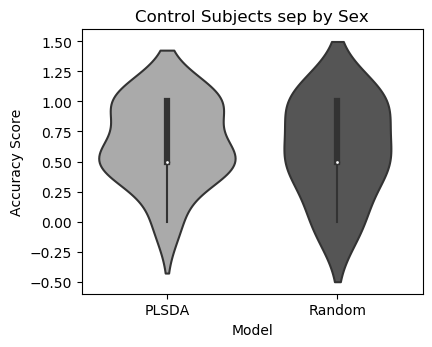

T-test for Control Subjects sep by Sex yields: Ttest_indResult(statistic=0.304603849540086, pvalue=0.7642444117441555)


C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat

C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat

C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 0
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 9
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 8
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat

<Figure size 495x394 with 0 Axes>

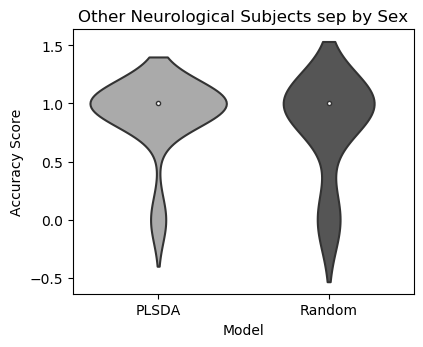

T-test for Other Neurological Subjects sep by Sex yields: Ttest_indResult(statistic=0.5999999999999998, pvalue=0.5565650165675333)


<Figure size 495x394 with 0 Axes>

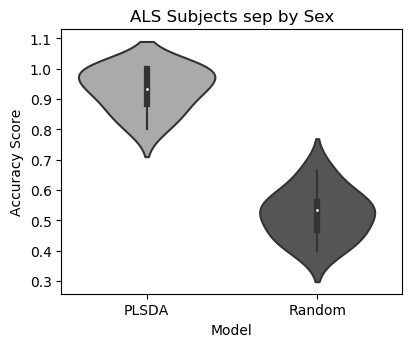

T-test for ALS Subjects sep by Sex yields: Ttest_indResult(statistic=12.054159619966553, pvalue=5.769468093506962e-10)


<Figure size 495x394 with 0 Axes>

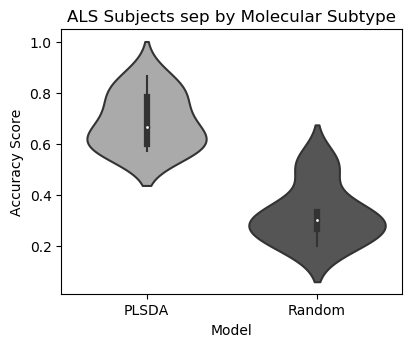

T-test for ALS Subjects sep by Molecular Subtype yields: Ttest_indResult(statistic=7.424582842136438, pvalue=7.06535964283239e-07)


<Figure size 495x394 with 0 Axes>

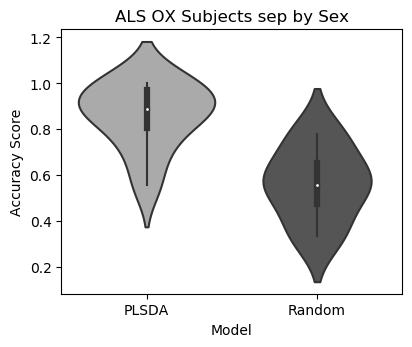

T-test for ALS OX Subjects sep by Sex yields: Ttest_indResult(statistic=4.422000788933753, pvalue=0.00033485578465554947)


C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)


<Figure size 495x394 with 0 Axes>

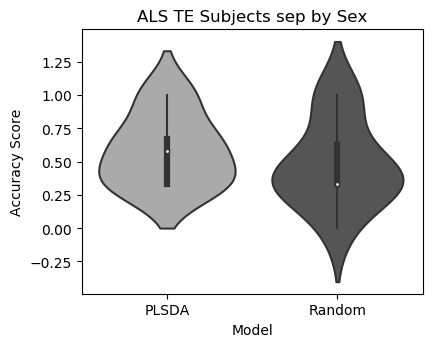

T-test for ALS TE Subjects sep by Sex yields: Ttest_indResult(statistic=0.764746719591757, pvalue=0.45467736576510054)


C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 17
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\Viraat Goel\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:292: UserWarning: Y residual constant at iteration 18
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\V

<Figure size 495x394 with 0 Axes>

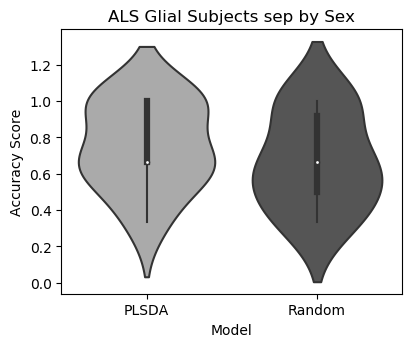

T-test for ALS Glial Subjects sep by Sex yields: Ttest_indResult(statistic=0.7453559924999302, pvalue=0.46574979520848114)


In [10]:
# Specifically comparative PLS-DAs
datasets = [femaleData, maleData, controlData, otherNDData, alsData, alsOXData, alsTEData, alsGliaData]
datasetLabels = ['Female Subjects', 'Male Subjects', 'Control Subjects', 'Other Neurological Subjects',
                'ALS Subjects', 'ALS OX Subjects', 'ALS TE Subjects', 'ALS Glial Subjects']
separators = [[femaleData_SG, femaleData_MS], [maleData_SG, maleData_MS],
             [controlData_MF], [otherNDData_MF], [alsData_MF, alsData_MS],
             [alsOXData_MF], [alsTEData_MF], [alsGliaData_MF]]
separatorLabels = [['Subject Group', 'Molecular Subtype'], ['Subject Group', 'Molecular Subtype'],
                  ['Sex'], ['Sex'], ['Sex', 'Molecular Subtype'],
                  ['Sex'], ['Sex'], ['Sex']]
legendLabels = [['Female', 'Male'], ['Control', 'Non-ALS NeuroDisorder', 'ALS'],
                         ['ALS-OX', 'ALS-TE', 'ALS-Glia', 'Non-ALS']]

expVar = pd.DataFrame()
topGenes = pd.DataFrame()

currData = 0
for i in datasets:
    dataset = i
    datasetName = datasetLabels[currData]
    
    currSep = 0
    for j in separators[currData]:
        separator = j
        separatorName = separatorLabels[currData][currSep]
        
        if(separatorName == 'Sex'):
            legendLabel = legendLabels[0]
        elif(separatorName == 'Subject Group'):
            legendLabel = legendLabels[1]
        else:
            legendLabel = legendLabels[2]
        
        numComp = 9
        plsr = PLSRegression(n_components=numComp, scale=False)
        plsr.fit(dataset, separator)

        # print(plsr.x_scores_) # scores
        # print(plsr.x_scores_.shape) # scores
        # print(plsr.x_weights_) # loadings
        # print(plsr.x_weights_.shape) # loadings

        scores = pd.DataFrame(plsr.x_scores_)
        # print(scores)
        scores.index = dataset.index
        
        plsColumnNames = []
        for i in range(numComp):
            plsColumnNames.append('LV ' + str(i + 1))
        scores.columns = plsColumnNames
        
        colormap = {
            0: '#ff0000',  # Red
            1: '#0000ff',  # Blue
            2: '#40e0d0',  # Cyan
            3: '#b19cd9',  # Purple
        }
        
        scores[separatorName] = separator
        groups = scores.groupby(separatorName)
        figure(num=None, figsize=(4.95,3.94), dpi=100)
        for name, group in groups:
            plt.scatter(group['LV 1'], group['LV 2'], s=30, alpha=0.7, c=colormap[name], label=legendLabel[name])
        plt.xlabel('LV 1 Scores, ' + datasetName + ' sep by ' + separatorName)
        plt.ylabel('LV 2 Scores, ' + datasetName + ' sep by ' + separatorName)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.savefig('figures/plsda_' + datasetName.replace(" ", "") + '_' +
                    separatorName.replace(" ", "") + '.png', bbox='tight')
        # plt.show()
        plt.clf()
        scores.drop(separatorName, axis=1)

        # How much variance does each LV explain?
        total_variance_in_x = np.var(dataset, axis = 0)
        tv = total_variance_in_x.sum()
        variance_in_x = np.var(plsr.x_scores_, axis = 0) 
        fractions_of_explained_variance = variance_in_x / tv
        expVar[(datasetName + '_' + separatorName).replace(" ", "")] = fractions_of_explained_variance

        # Extract the genes contributing the most to the model
        model_coeff = plsr.coef_ # The coefficient of contribution of each gene to the PLS-DA model
        absval_coeff = np.abs(model_coeff) # Takes the absolute value of the coefficients to compare contribution magnitudes
        sort_ind1 = absval_coeff.argsort(axis=0) # Yields the indices, sorted ascendingly, for genes contributing the most
        sorted_vals = absval_coeff[sort_ind1][::-1].squeeze() # Yields the contribution values of genes, sorted descendingly
        sort_ind2 = sort_ind1[::-1] # Yields the indices, sorted descendingly, for genes contributing the most

        df_plsda_res = pd.DataFrame(data=list(sorted_vals), columns=['Contribution Coeff. Mag.'])
        df_plsda_res['Gene Indices'] = sort_ind2
        genes = list(dataset.columns)
        modelContributors = []
        for i in sort_ind2:
            modelContributors.append(genes[i[0]])
        # print(modelContributors[:5])
        
        topGenes[(datasetName + '_' + separatorName).replace(" ", "")] = modelContributors[:25]
        # df_plsda_res['Genes'] = modelContributors
        # df_plsda_res = df_plsda_res.set_index('Genes')
        # print(df_plsda_res)
        
        # Generate a plot of model MSE vs. no. of included components for each PLS-DA model as a check on numComp
        n = len(dataset)
        
        # 10-fold CV, with shuffle
        kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

        mse = []

        for i in np.arange(1, 20):
            pls = PLSRegression(n_components = i)
            score = model_selection.cross_val_score(pls, dataset, separator, cv=kf_10, scoring='neg_mean_squared_error').mean()
            mse.append(-score)

        plt.plot(np.arange(1, 20), np.array(mse), '-v')
        plt.xlabel('Number of components in PLS-DA')
        plt.ylabel('MSE, ' + datasetName + ' sep by ' + separatorName)
        plt.xlim(xmin=-1)
        plt.savefig('figures/plsdaMSE_' + datasetName.replace(" ", "") + '_' +
                    separatorName.replace(" ", "") + '.png', bbox='tight')
        plt.clf()
        
        # 10-fold CV of PLS-DA
        X = dataset.values
        y = separator
        Y_rand = pd.DataFrame(random.sample(separator, len(separator)))

        accuracy = cross_val_plsda(X,y)
        accuracy_rand = cross_val_plsda(X, Y_rand.values)

        cross_vals = pd.DataFrame([accuracy, accuracy_rand]).T
        cross_vals.columns = ['PLSDA','Random']

        cross_vals = cross_vals.melt(var_name='Model', value_name='Accuracy Score')

        figure(num=None, figsize=(4.4,3.5), dpi=100)
        ax = sns.violinplot(x = 'Model', y = 'Accuracy Score', data=cross_vals, palette = "binary")
        ax.set_title(datasetName + ' sep by ' + separatorName)
        plt.savefig('figures/plsdaVP_' + datasetName.replace(" ", "") + '_' +
            separatorName.replace(" ", "") + '.png', bbox='tight')
        plt.show()

        #T-test
        print('T-test for ' + datasetName + ' sep by ' + separatorName + ' yields: ' +
              str(sciStats.ttest_ind(accuracy,accuracy_rand, equal_var = False)))
        
        currSep = currSep + 1
    currData = currData + 1

expVar.index = plsColumnNames
topGenes.to_excel("figures/plsda_topgenes.xlsx") 
# print(expVar)
# print(topGenes)

In [11]:
print(expVar)

      FemaleSubjects_SubjectGroup  FemaleSubjects_MolecularSubtype  \
LV 1                     0.067830                         0.114532   
LV 2                     0.138162                         0.157237   
LV 3                     0.021342                         0.019665   
LV 4                     0.047710                         0.044448   
LV 5                     0.043444                         0.023684   
LV 6                     0.027705                         0.019253   
LV 7                     0.013120                         0.018507   
LV 8                     0.015709                         0.018808   
LV 9                     0.016625                         0.012813   

      MaleSubjects_SubjectGroup  MaleSubjects_MolecularSubtype  \
LV 1                   0.069413                       0.050977   
LV 2                   0.080196                       0.049213   
LV 3                   0.040808                       0.164078   
LV 4                   0.022551    

In [12]:
print(topGenes)
topGenes.to_excel("figures/plsda_topgenes.xlsx") 

   FemaleSubjects_SubjectGroup FemaleSubjects_MolecularSubtype  \
0                    SERPINB12                           APELA   
1                       ELOA3C                        HOXB-AS3   
2                       ELOA3B                       CNTFR-AS1   
3                        GABRP                    LOC105376975   
4                       SLC5A4                            CD1B   
5                   ADARB2-AS1                          TCHHL1   
6                    LINC01851                         EVX1-AS   
7                         SYCN                         PRR23D1   
8                     FAM90A7P                         PRR23D2   
9                   ANKRD20A9P                      ADARB2-AS1   
10                     FAM74A1                       SERPINB12   
11                     MIR1827                       LINC01093   
12                LOC101927357                            CD1E   
13                       SPTA1                         EXOC3L4   
14        

In [ ]:
"""
Y_rand = pd.DataFrame(random.sample(alsData_MF, len(alsData_MF)))

# print(Y_rand)

accuracy_rand = cross_val_plsda(X, Y_rand.values)

print(accuracy_rand)

# Plot results
figure(num=None, figsize=(6.6,5.25), dpi=100)
plt.plot(np.array(accuracy_rand), '-v')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xlim(xmin=-1)
plt.show()
"""

In [ ]:
"""
from scipy import stats

X = alsData.values
y = alsData_MF
#for i in alsData_MF:
#    y.append([i])
Y_rand = pd.DataFrame(random.sample(alsData_MF, len(alsData_MF)))

accuracy = cross_val_plsda(X,y)
accuracy_rand = cross_val_plsda(X, Y_rand.values)

cross_vals = pd.DataFrame([accuracy, accuracy_rand]).T
cross_vals.columns = ['PLSDA','Random']

cross_vals = cross_vals.melt(var_name='Model', value_name='Accuracy Score')

figure(num=None, figsize=(4.4,3.5), dpi=100)
ax = sns.violinplot(x = 'Model', y = 'Accuracy Score', data=cross_vals, palette = "bone")
plt.show()

#T-test
#print(ttest_ind(accuracy,accuracy_rand, equal_var = False))
"""

In [ ]:
"""
# Calculate the cumulative explained variance as more components are included
num_com = []
com_counter = 0
cum_exvar = []
cum_counter = 0
for i in explained_variance:
    com_counter = com_counter + 1
    num_com.append(com_counter)
    cum_counter = cum_counter + i
    cum_exvar.append(cum_counter)
# print(cum_exvar)

# Plot the cumulative explained variance vs. the # of included components
plt.figure = figure(num=None, figsize=(5.2,3.8), dpi=100)
plt.plot(num_com,cum_exvar,'--o')
plt.xlabel('Number of Included PCA Components')
plt.ylabel('Total Variance Explained')
plt.xticks(num_com,num_com)
plt.yticks(np.linspace(0.4,1.0,7))
plt.tight_layout()
plt.savefig('figures/pca10_control_varexplained.png', bbox='tight')
"""

In [ ]:
"""
fPC1 = []
fPC2 = []
mPC1 = []
mPC2 = []
i = 0
while(i < len(sexInfo)):
    if(sexInfo[i] == 'Female'):
        fPC1.append(pcaScores[i,0])
        fPC2.append(pcaScores[i,1])
    else:
        mPC1.append(pcaScores[i,0])
        mPC2.append(pcaScores[i,1])
    i = i + 1

plt.figure = figure(num=None, figsize=(5.2,3.8), dpi=100)
plt.scatter(fPC1, fPC2, c='magenta', s=8, label='F')
plt.scatter(mPC1, mPC2, c='blue', s=8, label='M')
plt.xlabel('PC1 (' + str(int(explained_variance[0]*100000)/1000) + '%)')
plt.ylabel('PC2 (' + str(int(explained_variance[1]*100000)/1000) + '%)')
plt.legend()
plt.tight_layout()
plt.savefig('figures/pc1_pc2_control.png', bbox='tight')
plt.show()
"""

In [ ]:
"""
sc = StandardScaler()
dfLogScaled = sc.fit_transform(sortedLogDF) 

import sys
sys.setrecursionlimit(10000)

ax = sns.clustermap(dfLogScaled, figsize=(10, 15))
plt.savefig('figures/clustermap_db39_log.png')
"""

In [ ]:
"""
# Specifically comparative PLS-DAs
datasets = [femaleData, maleData, controlData, otherNDData, alsData, alsOXData, alsTEData, alsGliaData]
datasetLabels = ['Female Subjects', 'Male Subjects', 'Control Subjects', 'Other Neurological Subjects',
                'ALS Subjects', 'ALS OX Subtype Subjects', 'ALS TE Subtype Subjects', 'ALS Glial Subtype Subjects']
separators = [[femaleData_SG, femaleData_MS], [maleData_SG, maleData_MS],
             [controlData_MF, controlData_MS], [otherNDData_MF, otherNDData_MS], [alsData_MF, alsData_MS],
             [alsOXData_MF, alsOXData_SG], [alsTEData_MF, alsTEData_SG], [alsGliaData_MF, alsGliaData_SG]]
separatorLabels = [['Subject Group', 'Molecular Subtype'], ['Subject Group', 'Molecular Subtype'],
                  ['Sex', 'Molecular Subtype'], ['Sex', 'Molecular Subtype'], ['Sex', 'Molecular Subtype'],
                  ['Sex', 'Subject Group'], ['Sex', 'Subject Group'], ['Sex', 'Subject Group']]
legendLabels = [['Female', 'Male'], ['Control', 'Other Neurological Disorder', 'ALS'],
                         ['ALS-OX', 'ALS-TE', 'ALS-Glia']]

currData = 0
for i in datasets:
    dataset = i
    datasetName = datasetLabels[currData]
    
    currSep = 0
    for j in separators[currData]:
        separator = j
        separatorName = separatorLabels[currData][currSep]
        
        if(separatorName == 'Sex'):
            legendLabel = legendLabels[0]
        elif(separatorName == 'Subject Group'):
            legendLabel = legendLabels[1]
        else:
            legendLabel = legendLabels[2]
        
        numComp = 9
        plsr = PLSRegression(n_components=numComp, scale=False)
        plsr.fit(dataset, separator)

        # print(plsr.x_scores_) # scores
        # print(plsr.x_scores_.shape) # scores
        # print(plsr.x_weights_) # loadings
        # print(plsr.x_weights_.shape) # loadings

        scores = pd.DataFrame(plsr.x_scores_)
        # print(scores)
        scores.index = dataset.index
        
        plsColumnNames = []
        for i in range(numComp):
            plsColumnNames.append('LV ' + str(i + 1))
        scores.columns = plsColumnNames

        colormap = {
            0: '#ff0000',  # Red
            1: '#0000ff',  # Blue
            2: '#A9A9A9',  # Gray
            3: '#00FF00',  # Green
        }
        colorlist = [colormap[c] for c in separator]
        
        colors = []
        for i in range(len(list(dict.fromkeys(separator)))):
            colors.append(colormap[i])
        scores[separatorName] = separator
        for target, color in zip(legendLabel,colors):
            indicesToKeep = scores[separatorName] == legendLabel.index(target)
            ax.scatter(scores.loc[indicesToKeep, 'LV 1'], scores.loc[indicesToKeep, 'LV 2'],
                       c=color, s=50, alpha=0.7)
            
        # ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
        ax.set_xlabel('Scores on LV 1, ' + datasetName + ' separated by ' + separatorName)
        ax.set_ylabel('Scores on LV 2, ' + datasetName + ' separated by ' + separatorName)
        ax.legend(legendLabel, loc='best')
        plt.tight_layout()
        plt.savefig('figures/plsda_' + datasetName.replace(" ", "") + '_' + separatorName.replace(" ", "") + '.png', bbox='tight')
        plt.show()
        
        scores.drop(separatorName, axis=1)

        # How much variance does each LV explain?
        total_variance_in_x = np.var(dataset, axis = 0)
        tv = total_variance_in_x.sum()
        variance_in_x = np.var(plsr.x_scores_, axis = 0) 
        fractions_of_explained_variance = variance_in_x / tv
        print('LV explained variance for ' + datasetName + ' and sep ' + separatorName + ' = ' + str(fractions_of_explained_variance))

        # Extract the genes contributing the most to the model
        model_coeff = plsr.coef_ # The coefficient of contribution of each gene to the PLS-DA model
        absval_coeff = np.abs(model_coeff) # Takes the absolute value of the coefficients to compare contribution magnitudes
        sort_ind1 = absval_coeff.argsort(axis=0) # Yields the indices, sorted ascendingly, for genes contributing the most
        sorted_vals = absval_coeff[sort_ind1][::-1].squeeze() # Yields the contribution values of genes, sorted descendingly
        sort_ind2 = sort_ind1[::-1] # Yields the indices, sorted descendingly, for genes contributing the most

        df_plsda_res = pd.DataFrame(data=list(sorted_vals), columns=['Contribution Coeff. Mag.'])
        df_plsda_res['Gene Indices'] = sort_ind2
        genes = list(dataset.columns)
        modelContributors = []
        for i in sort_ind2:
            modelContributors.append(genes[i[0]])
        print(modelContributors[:5])
        df_plsda_res['Genes'] = modelContributors
        df_plsda_res = df_plsda_res.set_index('Genes')
        # print(df_plsda_res)
        
        currSep = currSep + 1
    currData = currData + 1
"""

In [ ]:
"""
dataset = alsGliaData
datasetName = 'ALS Glia Subjects'
separator = alsGliaData_MF
separatorName = 'Sex'
numComp = 9

plsr = PLSRegression(n_components=numComp, scale=False)
plsr.fit(dataset, separator)

# print(plsr.x_scores_) # scores
print(plsr.x_scores_.shape) # scores
# print(plsr.x_weights_) # loadings
print(plsr.x_weights_.shape) # loadings

scores = pd.DataFrame(plsr.x_scores_)
# print(scores)
scores.index = dataset.index

colormap = {
    0: '#ff0000',  # Red
    1: '#0000ff',  # Blue
    2: '#A9A9A9',  # Gray
    3: '#00FF00',  # Green
}
colorlist = [colormap[c] for c in separator]

ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, c=colorlist, figsize=(6,6))
ax.set_xlabel('Scores on LV 1, data = ' + datasetName + ' & sep = ' + separatorName)
ax.set_ylabel('Scores on LV 2, data = ' + datasetName + ' & sep = ' + separatorName)
plt.tight_layout()
plt.savefig('figures/plsda_' + datasetName + '_' + separatorName + '.png', bbox='tight')
# plt.show()

# How much variance does each LV explain?
total_variance_in_x = np.var(dataset, axis = 0)
tv = total_variance_in_x.sum()
variance_in_x = np.var(plsr.x_scores_, axis = 0) 
fractions_of_explained_variance = variance_in_x / tv
print('LV explained variance for ' + datasetName + ' and sep ' + separatorName + ' = ' + str(fractions_of_explained_variance))

# Extract the genes contributing the most to the model
model_coeff = plsr.coef_ # The coefficient of contribution of each gene to the PLS-DA model
absval_coeff = np.abs(model_coeff) # Takes the absolute value of the coefficients to compare contribution magnitudes
sort_ind1 = absval_coeff.argsort(axis=0) # Yields the indices, sorted ascendingly, for genes contributing the most
sorted_vals = absval_coeff[sort_ind1][::-1].squeeze() # Yields the contribution values of genes, sorted descendingly
sort_ind2 = sort_ind1[::-1] # Yields the indices, sorted descendingly, for genes contributing the most

df_plsda_res = pd.DataFrame(data=list(sorted_vals), columns=['Contribution Coeff. Mag.'])
df_plsda_res['Gene Indices'] = sort_ind2
genes = list(dataset.columns)
modelContributors = []
for i in sort_ind2:
    modelContributors.append(genes[i[0]])
print(modelContributors[:5])
df_plsda_res['Genes'] = modelContributors
df_plsda_res = df_plsda_res.set_index('Genes')
# print(df_plsda_res)
"""

In [ ]:
"""
n = len(dataset)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components = i)
    score = model_selection.cross_val_score(pls, dataset, separator, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of components in PLS-DA')
plt.ylabel('MSE, ' + datasetName + ' sep by ' + separatorName)
plt.xlim(xmin=-1)
plt.savefig('figures/plsdaMSE_' + datasetName + '_' + separatorName + '.png', bbox='tight')
"""

In [ ]:
"""
# dataBreakdown = 'GSE124439'
# dataStart = 37
dataBreakdown = 'GSE122649'
dataStart = 32
breakdownPath = ('data/' + dataBreakdown + '_series_matrix.txt')
breakdownData = pd.read_csv(breakdownPath, sep = "\s+", header = dataStart)
desiredData = [0, 6, 9]
# print(breakdownData)
sample = list(df.loc[[0]])
sample.pop(0)
# print(sample)
ID = list(df.loc[[9]])
ID.pop(0)
print(ID)
"""